I scraped the data from Auto trade, which is the number one website to buying car in the UK. I will be using Machine Learning Models to predict the Car Prices. Before that, I will be taking necessary steps to set up the data:

- Check missing values and outliers (done in EDA)

- converting categorical data into get dummies

In [1]:
#libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# import data after EDA 

In [3]:
data = pd.read_csv('Autotrade_EDA.csv')

In [4]:
#dropping irrelvant columns

In [5]:
data = data.drop(['Unnamed: 0','Car_Title'],axis=1)

In [6]:
data.head()
#data.Car_engine_size.str.replace('L','')

,Car_Price,Car_Year,Car_Type_Door,Car_Mileage,Car_engine_size,Car_Horse_PW,Car_Type_Vehicle,Car_Filling_in,Car_Make
0,13699,2018,SUV,19228,1.6L,132PS,Manual,Petrol,Hyundai
1,19000,2016,Coupe,12000,3.0L,326BHP,Automatic,Petrol,BMW
2,1205,2007,Hatchback,70699,1.6L,109BHP,Manual,Petrol,Nissan
3,5750,2005,SUV,137000,5.0L,307BHP,Automatic,Diesel,Volkswagen
4,5250,2009,Saloon,80040,3.0L,221BHP,Automatic,Diesel,Mercedes-Benz


In [7]:
print('Dataset :',data.shape)

Dataset : (7365, 9)


# get Dummies

In [8]:
#Categorical Columns
cat = data[[ 'Car_Type_Door',
       'Car_engine_size', 'Car_Horse_PW', 'Car_Type_Vehicle', 'Car_Filling_in',
       'Car_Make']]


In [9]:
#Dummy variables 
dummie = pd.get_dummies(cat)

In [10]:
#Concating the two DataFrames
df = pd.concat([data,dummie],axis=1)

In [11]:
#Dropping Original Columns

df = df.drop([ 'Car_Type_Door',
       'Car_engine_size', 'Car_Horse_PW', 'Car_Type_Vehicle', 'Car_Filling_in',
       'Car_Make'],axis=1)

In [12]:
#first five rows
df.head()

,Car_Price,Car_Year,Car_Mileage,Car_Type_Door_Convertible,Car_Type_Door_Coupe,Car_Type_Door_Estate,Car_Type_Door_Hatchback,Car_Type_Door_Limousine,Car_Type_Door_MPV,Car_Type_Door_Minibus,...,Car_Make_Smart,Car_Make_Ssangyong,Car_Make_Subaru,Car_Make_Suzuki,Car_Make_TVR,Car_Make_Toyota,Car_Make_Triumph,Car_Make_Vauxhall,Car_Make_Volkswagen,Car_Make_Volvo
0,13699,2018,19228,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,19000,2016,12000,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1205,2007,70699,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,5750,2005,137000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,5250,2009,80040,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
print('Dataset :',df.shape)

Dataset : (7365, 475)


In [14]:
#mising data 
df.isnull().sum().sum()

0

# Model 

In [15]:
#Setting Variables
X = df.drop('Car_Price',axis=1)
y = df['Car_Price']

### Sklearn Libraries

In [16]:
#splitting the data set
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

# Fitting the Model 
from sklearn.linear_model import LinearRegression,Lasso
from sklearn.ensemble import RandomForestRegressor

#evaluation
from sklearn.metrics import mean_absolute_error,r2_score

In [17]:
#train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [18]:
#Linear Regression
lm = LinearRegression()
lm.fit(X_train,y_train)
np.mean(cross_val_score(lm,X_train,y_train,scoring='neg_mean_absolute_error'))

-37109418.1513734

In [19]:
#Lasso
lm_1 = Lasso()
lm_1.fit(X_train,y_train)
np.mean(cross_val_score(lm_1,X_train,y_train,scoring='neg_mean_absolute_error'))

C:\Users\Owner\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2796141162.616185, tolerance: 13354931.228233974
  positive)


-1584.7815434423096

In [84]:
#Decision Tree
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor()
tree.fit(X_train,y_train)
np.mean(cross_val_score(tree,X_train,y_train,scoring='neg_mean_absolute_error'))

-1863.3711555949023

In [85]:
#KNeighbour 
from sklearn.neighbors import KNeighborsRegressor
Knn = KNeighborsRegressor()
Knn.fit(X_train,y_train)
np.mean(cross_val_score(Knn,X_train,y_train,scoring='neg_mean_absolute_error'))

-3747.904079447833

In [86]:
#Random Forest 
from sklearn.ensemble import RandomForestRegressor
rg = RandomForestRegressor()
rg.fit(X_train,y_train)
np.mean(cross_val_score(rg,X_train,y_train,scoring='neg_mean_absolute_error'))

-1435.0098741264787

Random forest is the best model so far, I'm going to using GridSearchCV to make the model better.

## Hyperparameter - GridSearchCV

In [21]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'criterion': ('mae','mse'),
    'max_features': ['auto','sqrt','log2'],
    'n_estimators': range(1,100,10)
}
# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, scoring='neg_mean_absolute_error',
                          cv = 3, n_jobs = -1, verbose = 2)

In [22]:
grid_search.fit(X,y)

Fitting 3 folds for each of 60 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed: 46.1min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 58.6min
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed: 59.0min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [23]:
grid_search.best_score_

-1440.5990440458045

In [24]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='sqrt', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=91, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

using the information above to fit the model again on random forest regression 

In [29]:
rfc1=RandomForestRegressor(random_state=42,bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='sqrt', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=91, n_jobs=None, oob_score=False, verbose=0, warm_start=False)
rfc1.fit(X_train, y_train)
np.mean(cross_val_score(rfc1,X_train,y_train,scoring='neg_mean_absolute_error'))

-1381.2215020161352

In [87]:
#test predict
lm_pred = lm.predict(X_test)
lm_1_pred = lm_1.predict(X_test)
tree_prd = tree.predict(X_test)
rg_pred = rg.predict(X_test)
gs_pred = grid_search.best_estimator_.predict(X_test)
rfc_pred = rfc1.predict(X_test)

In [88]:
#mae on testing dataset

from sklearn.metrics import mean_absolute_error,r2_score
print('mae for Linear Regression :',mean_absolute_error(y_test,lm_pred))
print('mae for Lasso :',mean_absolute_error(y_test,lm_1_pred))
print('mae for Decision Tree :',mean_absolute_error(y_test,tree_prd))
print('mae for Random Forest Regressor :',mean_absolute_error(y_test,rg_pred))
print('mae for Grid Search CV :',mean_absolute_error(y_test,gs_pred))
print('mae for new Random Forest Regressor :',mean_absolute_error(y_test,rfc_pred))

mae for Linear Regression : 68542375.27289268
mae for Lasso : 1609.0466759849664
mae for Decision Tree : 1759.26723669924
mae for Random Forest Regressor : 1387.4675514192647
mae for Grid Search CV : 478.2970227536712
mae for new Random Forest Regressor : 1366.6207392133056


In [33]:
#r^2 score on Testing dataset
print('r2 score Testing for Linear Regression :',r2_score(y_test,lm_pred))
print('r2 score Testing for Lasso:',r2_score(y_test,lm_1_pred))
print('r2 score Testing for Random Forest Regresso :',r2_score(y_test,rg_pred))
print('r2 score Testing for Grid Search CV :',r2_score(y_test,gs_pred))
print('r2 score Testing for new Random Forest Regressor :',r2_score(y_test,rfc_pred))

r2 score Testing for Linear Regression : -34302577027.46132
r2 score Testing for Lasso: 0.8417540247476921
r2 score Testing for Random Forest Regresso : 0.8684575490832105
r2 score Testing for Grid Search CV : 0.9846806732493965
r2 score Testing for new Random Forest Regressor : 0.87621111440777


In [36]:
#r^2 score on Training dataset
print('r2 score for Linear Regression :',r2_score(y_train,lm.predict(X_train)))
print('r2 score for Lasso :',r2_score(y_train,lm_1.predict(X_train)))
print('r2 score for Random Forest Regressor :',r2_score(y_train,rg.predict(X_train)))
print('r2 score for Grid Search CV :',r2_score(y_train,grid_search.best_estimator_.predict(X_train)))
print('r2 score Testing for new Random Forest Regressor :',r2_score(y_train,rfc1.predict(X_train)))

r2 score for Linear Regression : 0.8861079863493933
r2 score for Lasso : 0.8692984197869568
r2 score for Random Forest Regressor : 0.9802279013167144
r2 score for Grid Search CV : 0.9842433761732711
r2 score Testing for new Random Forest Regressor : 0.9827649347704047


The Random Forest model far outperformed using GridSearchCV on both testing and training set.

Best Model produce MAE = £479

# Feature Importances

In [37]:
# rename column names 
col = X.columns.str.replace('Car_Type_','').str.replace('Car_','').str.replace('_',' ')

In [39]:

feat_importances = pd.Series(grid_search.best_estimator_.feature_importances_,index=col)

In [48]:
import matplotlib.style as style 
sns.set_style("darkgrid")

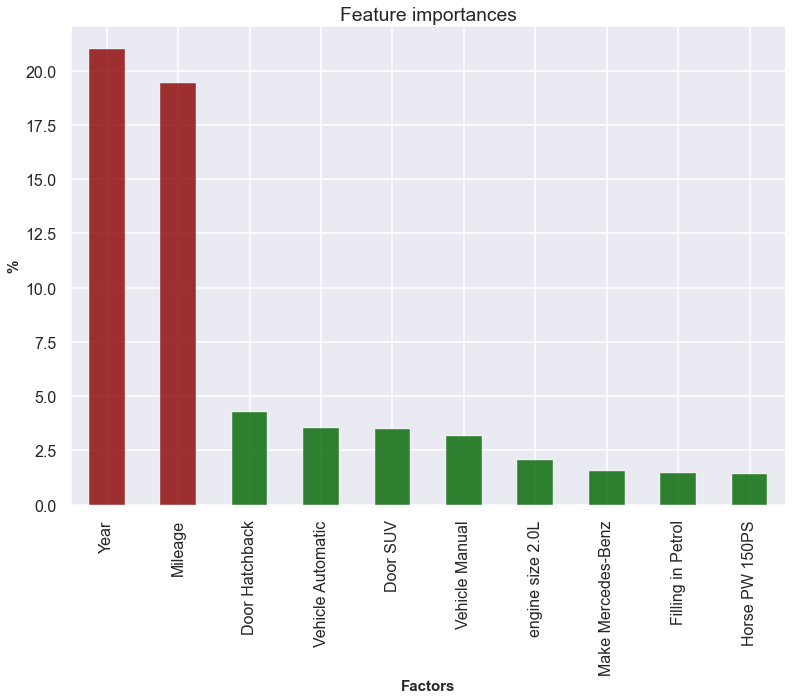

In [89]:
barplot = feat_importances.mul(100).nlargest(10)
colormat= ['darkred','darkred','darkgreen','darkgreen','darkgreen','darkgreen','darkgreen','darkgreen'
           ,'darkgreen','darkgreen'  ]

barplot.plot(kind='bar',title='Feature importances', color = colormat, alpha = 0.8)
#barplot[0]('darkred')
plt.xlabel('Factors', fontsize = 15, weight = 'bold')
plt.ylabel('%', fontsize = 15, weight = 'bold')
plt.show()

In [50]:
feat_importances.mul(100).nlargest(2).sum()

41.41983107135382

Two fifth of the features are contribute by the Year and Mileage of the car followed by other important features. From early analysis, it is clearly obvious how many price is affected by year and mileage.


# Save Model 

In [79]:
import pickle
pickl = {'model': rfc1}
pickle.dump( pickl, open( 'model_file' + ".p", "wb" ) )

# Load Model - to test

In [80]:
file_name = "model_file.p"
with open(file_name, 'rb') as pickled:
    data = pickle.load(pickled)
    model = data['model']

In [81]:
#testing the model 
model.predict(np.array(list(X_test.iloc[29,:])).reshape(1,-1))[0]

8070.912087912088

In [82]:
X_test.iloc[29,:]

Car_Year                     2019
Car_Mileage                  6750
Car_Type_Door_Convertible       0
Car_Type_Door_Coupe             0
Car_Type_Door_Estate            0
                             ... 
Car_Make_Toyota                 0
Car_Make_Triumph                0
Car_Make_Vauxhall               1
Car_Make_Volkswagen             0
Car_Make_Volvo                  0
Name: 865, Length: 474, dtype: int64